In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/christinen/stat_3255/final-project-ChristineN021/Data/Hartford730.csv')

* Abstract
* Intro that highlights reasoning
* Specific Aims
* Data Description
* Methods and Applications
    + Data Cleaning
    + Exploratory Data Analysis
    + The Regularlized Regression Model and its assumptions, feature selection
    + Model Selection and Training: train the model on the training set and fine-tune the hyperparameters using techniques like cross-validation.
    + Model Evaluation
* Conclusion and Results
* Discussion
* References

# Data Cleaning

In [3]:
# Show the first five rows of the data
pd.set_option('display.max_columns', None)
data.head()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,OwnerLastName,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,AssrLandUse
0,8347,7,16.0,278-816-169,938,0006,WETHERSFIELD AVE,236,NaN,654.00000,1.0,938 WETHERSFIELD AVE LLC,NaN,BROTHERS IN BLUE LLC,05/03/2022,176000,42100,07951-0127,25,10,CONDOMINIMUM
1,5053,4,11.0,229-649-035,55,NaN,CROWN ST,46,6960.0,2404.80001,2.0,LUNA,GUILLERMO,CORREA RANDY,08/05/2021,250000,233100,07806-0123,1,10,TWO FAMILY
2,4550,5,12.0,232-768-134,240,NaN,SOUTH ST,41,7500.0,3822.00000,3.0,ARAUJO,ROGER,PAZ DELIA M,02/07/2022,185000,200400,07905-0091,26,10,THREE FAMILY
3,18326,5,12.0,176-200-189,1045,NaN,ALBANY AVE,179,6700.0,3302.75000,3.0,BROOKS,CATHY,1047 ALBANY AVE LLC,05/12/2021,320000,49700,07764-0144,27,10,THREE FAMILY
4,6121,5,12.0,231-673-225,154,NaN,CAMPFIELD AVE,43,6150.0,3759.00000,3.0,ARTHUR,PETER,ARTHUR PETER L,12/17/2021,1,311300,07879-0115,5,8,THREE FAMILY


Categorical Data Visualization

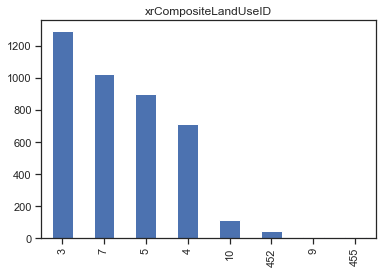

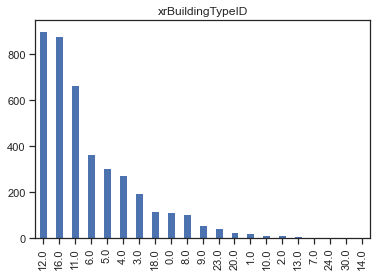

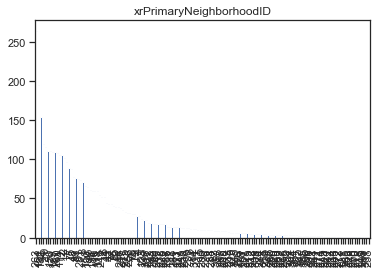

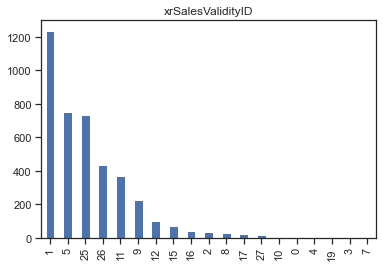

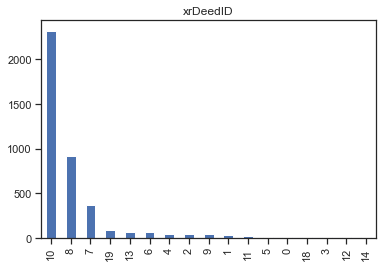

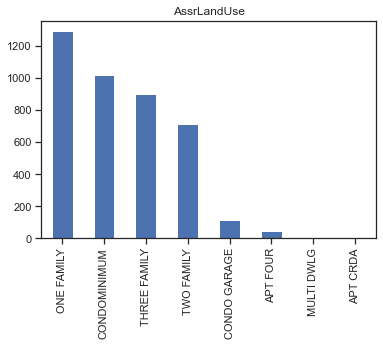

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# select categorical columns to visualize
cat_cols = ['xrCompositeLandUseID', 'xrBuildingTypeID', 'xrPrimaryNeighborhoodID', 'xrSalesValidityID', 'xrDeedID', 'AssrLandUse']

# plot the frequency of each categorical variable
for col in cat_cols:
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


In [61]:
for col in cat_cols:
    freq = data[col].value_counts()
    pct = freq / len(data) * 100
    cat_data = pd.concat([freq, pct], axis=1, keys=['Frequency', 'Percentage'])
    print(f"Column name: {col}")
    print(cat_data)

Column name: xrCompositeLandUseID
     Frequency  Percentage
3         1292       31.60
7         1020       24.95
5          900       22.02
4          712       17.42
10         112        2.74
452         44        1.08
9            5        0.12
455          3        0.07
Column name: xrBuildingTypeID
       Frequency  Percentage
12.00        900       22.02
16.00        876       21.43
11.00        662       16.19
6.00         364        8.90
5.00         302        7.39
4.00         271        6.63
3.00         196        4.79
18.00        116        2.84
0.00         112        2.74
8.00         104        2.54
9.00          55        1.35
23.00         44        1.08
20.00         23        0.56
1.00          22        0.54
10.00         12        0.29
2.00          12        0.29
13.00          8        0.20
7.00           3        0.07
24.00          2        0.05
30.00          1        0.02
14.00          1        0.02
Column name: xrPrimaryNeighborhoodID
     Frequency  Pe

In [4]:
# Check for missing values
data.isnull().sum()

PropertyID                    0
xrCompositeLandUseID          0
xrBuildingTypeID              2
ParcelID                      0
LocationStartNumber           0
ApartmentUnitNumber        2959
StreetNameAndWay              0
xrPrimaryNeighborhoodID       0
LandSF                     1129
TotalFinishedArea           113
LivingUnits                   2
OwnerLastName                 6
OwnerFirstName             1402
PrimaryGrantor                0
SaleDate                      0
SalePrice                     0
TotalAppraisedValue           0
LegalReference                0
xrSalesValidityID             0
xrDeedID                      0
AssrLandUse                   0
dtype: int64

In [5]:
# Check for duplicates
data.duplicated().sum()

0

## Select Features and Relevant Columns, Then Clean

In [6]:
# Select relevant feature columns

selected_columns = ['PropertyID', 'StreetNameAndWay', 'LivingUnits', 'LegalReference', 'SalePrice', 'TotalAppraisedValue', 'LandSF', 'TotalFinishedArea', 'SaleDate', 'AssrLandUse']
cleaned = data[selected_columns]
print(cleaned.head())

   PropertyID  StreetNameAndWay  LivingUnits LegalReference  SalePrice  \
0        8347  WETHERSFIELD AVE          1.0     07951-0127     176000   
1        5053          CROWN ST          2.0     07806-0123     250000   
2        4550          SOUTH ST          3.0     07905-0091     185000   
3       18326        ALBANY AVE          3.0     07764-0144     320000   
4        6121     CAMPFIELD AVE          3.0     07879-0115          1   

   TotalAppraisedValue  LandSF  TotalFinishedArea    SaleDate   AssrLandUse  
0                42100     NaN          654.00000  05/03/2022  CONDOMINIMUM  
1               233100  6960.0         2404.80001  08/05/2021    TWO FAMILY  
2               200400  7500.0         3822.00000  02/07/2022  THREE FAMILY  
3                49700  6700.0         3302.75000  05/12/2021  THREE FAMILY  
4               311300  6150.0         3759.00000  12/17/2021  THREE FAMILY  


In [7]:
# Check for missing values
cleaned.isnull().sum()

PropertyID                0
StreetNameAndWay          0
LivingUnits               2
LegalReference            0
SalePrice                 0
TotalAppraisedValue       0
LandSF                 1129
TotalFinishedArea       113
SaleDate                  0
AssrLandUse               0
dtype: int64

In [8]:
# Remove rows with missing values
cleaned.dropna(inplace=True)

/var/folders/2s/x0bg73s92h9bjz7qdpc5l1080000gn/T/ipykernel_14145/2967837470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.dropna(inplace=True)


In [9]:
# Check for missing values
cleaned.isnull().sum()

PropertyID             0
StreetNameAndWay       0
LivingUnits            0
LegalReference         0
SalePrice              0
TotalAppraisedValue    0
LandSF                 0
TotalFinishedArea      0
SaleDate               0
AssrLandUse            0
dtype: int64

In [10]:
# Check for duplicates
cleaned.duplicated().sum()

33

In [11]:
# LivingUnits == 0 are considered Condo Garages and have no Finished Square Footage
print(data[data['LivingUnits'] == 0])

      PropertyID  xrCompositeLandUseID  xrBuildingTypeID     ParcelID  \
19         14651                    10               0.0  246-363-323   
27         13776                    10               0.0  249-558-124   
33         13796                    10               0.0  249-558-144   
35         22536                    10               0.0  246-363-684   
53         13641                    10               0.0  249-557-344   
...          ...                   ...               ...          ...   
3942       13769                    10               0.0  249-558-117   
3951       22458                    10               0.0  246-363-606   
4000       22584                    10               0.0  246-363-732   
4044       14559                    10               0.0  246-363-231   
4077       14570                    10               0.0  246-363-242   

      LocationStartNumber ApartmentUnitNumber StreetNameAndWay  \
19                      1                0141          GO

In [12]:
# Drop SalePrice, TotalFinishedArea and LandSF if they are zero, not plausible
cleaned = cleaned[cleaned['SalePrice'] != 0]
cleaned = cleaned[cleaned['LandSF'] != 0]
cleaned = cleaned[cleaned['TotalFinishedArea'] != 0] 

In [13]:
# Check for unique values in the Cleaned Dataset
print(cleaned.value_counts())

PropertyID  StreetNameAndWay  LivingUnits  LegalReference  SalePrice  TotalAppraisedValue  LandSF    TotalFinishedArea  SaleDate    AssrLandUse 
10414       HAMILTON ST       3.0          07728-0346      1          283800               4386.0    3759.00000         03/18/2021  THREE FAMILY    2
11050       WOODSIDE CIR      2.0          07665-0225      850000     1171400              156200.0  9424.00000         10/01/2020  MULTI DWLG      2
865         STORRS ST         1.0          07866-0278      166000     156500               7500.0    900.00000          11/22/2021  ONE FAMILY      2
2017        NEW BRITAIN AVE   2.0          07735-0327      1          240200               6387.0    2600.00000         04/05/2021  TWO FAMILY      2
17835       BOOTHBAY ST       2.0          08003-0137      1          175400               9030.0    1664.00000         08/17/2022  TWO FAMILY      2
                                                                                                         

In [14]:
# Check for duplicates
cleaned.duplicated().sum()

8

In [15]:
# Drop duplicates
cleaned.drop_duplicates(inplace=True)

In [16]:
# Check again for duplicates
cleaned.duplicated().sum()

0

In [17]:
print(cleaned)

      PropertyID StreetNameAndWay  LivingUnits LegalReference  SalePrice  \
1           5053         CROWN ST          2.0     07806-0123     250000   
2           4550         SOUTH ST          3.0     07905-0091     185000   
3          18326       ALBANY AVE          3.0     07764-0144     320000   
4           6121    CAMPFIELD AVE          3.0     07879-0115          1   
5           5061         CROWN ST          2.0     07787-0082     236000   
...          ...              ...          ...            ...        ...   
4079       17593       BURNHAM ST          2.0     07840-0146     275000   
4081        6945       BALDWIN ST          3.0     07964-0119          1   
4083       11878        ASHLEY ST          2.0     07908-0336     224000   
4084       16443  WESTBOURNE PKWY          2.0     07725-0086         10   
4085       12737       MORTSON ST          2.0     07894-0085     310000   

      TotalAppraisedValue  LandSF  TotalFinishedArea    SaleDate   AssrLandUse  
1     

# Exploratory Data Analysis

In [18]:
# Show the shape of the data
cleaned.shape

(1971, 10)

In [19]:
# Show basic statistics of the numerical features
pd.options.display.float_format = '{:.2f}'.format
description = cleaned.drop('PropertyID', axis=1).describe()
print(description)

       LivingUnits   SalePrice  TotalAppraisedValue    LandSF  \
count      1971.00     1971.00              1971.00   1971.00   
mean          2.02   418022.97            237390.07   7881.32   
std           5.72  3019337.49            517169.98   6291.84   
min           1.00        1.00                 0.00   1338.00   
25%           1.00   123000.00            174200.00   5750.00   
50%           2.00   201000.00            215900.00   7000.00   
75%           3.00   267000.00            260850.00   8250.00   
max         252.00 60500000.00          22640100.00 156200.00   

       TotalFinishedArea  
count            1971.00  
mean             2732.44  
std              6689.18  
min               616.00  
25%              1482.00  
50%              2552.00  
75%              3505.12  
max            293441.00  


In [20]:
# Show data types of each feature
cleaned.dtypes

PropertyID               int64
StreetNameAndWay        object
LivingUnits            float64
LegalReference          object
SalePrice                int64
TotalAppraisedValue      int64
LandSF                 float64
TotalFinishedArea      float64
SaleDate                object
AssrLandUse             object
dtype: object

/var/folders/2s/x0bg73s92h9bjz7qdpc5l1080000gn/T/ipykernel_14145/1658819734.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cleaned.drop('PropertyID', axis=1).corr()


<Axes: >

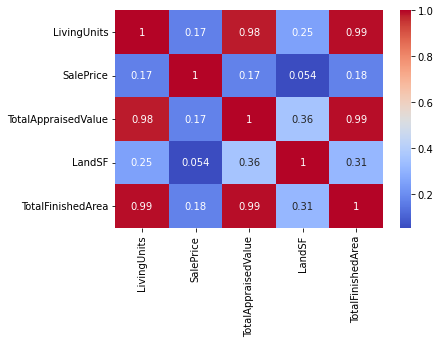

In [21]:
# Correlation heatmap of numerical features
corr = cleaned.drop('PropertyID', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Scatter plot of TotalFinishedArea vs SalePrice:

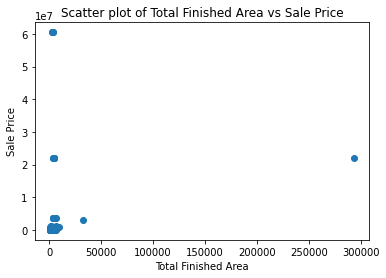

In [22]:
import matplotlib.pyplot as plt
plt.scatter(cleaned['TotalFinishedArea'], cleaned['SalePrice'])
plt.xlabel('Total Finished Area')
plt.ylabel('Sale Price')
plt.title('Scatter plot of Total Finished Area vs Sale Price')
plt.show()

Boxplot of SalePrice by LivingUnits:

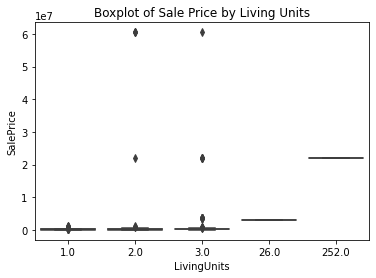

In [23]:
import seaborn as sns
sns.boxplot(x='LivingUnits', y='SalePrice', data=cleaned)
plt.title('Boxplot of Sale Price by Living Units')
plt.show()

Bar chart of AssrLandUse counts:

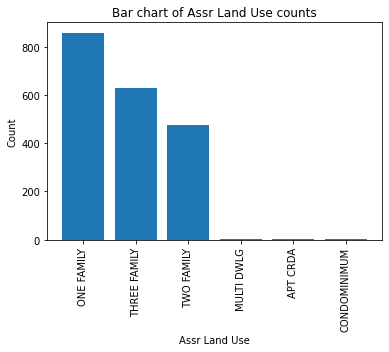

In [24]:
assr_land_use_counts = cleaned['AssrLandUse'].value_counts()
plt.bar(assr_land_use_counts.index, assr_land_use_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Assr Land Use')
plt.ylabel('Count')
plt.title('Bar chart of Assr Land Use counts')
plt.show()

Histogram of SalePrice:

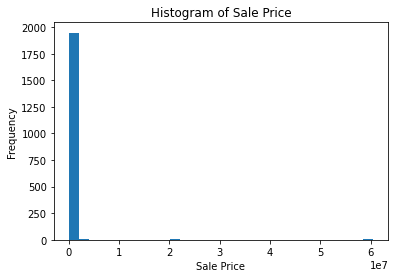

In [25]:
plt.hist(cleaned['SalePrice'], bins=30)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price')
plt.show()

Heatmap of correlation matrix:

/var/folders/2s/x0bg73s92h9bjz7qdpc5l1080000gn/T/ipykernel_14145/3564868758.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


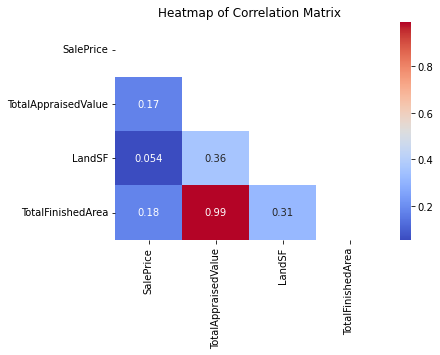

In [26]:
import numpy as np
corr = cleaned[['SalePrice', 'TotalAppraisedValue', 'LandSF', 'TotalFinishedArea']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

Box plot of SalePrice by AssrLandUse:

<Axes: xlabel='AssrLandUse', ylabel='SalePrice'>

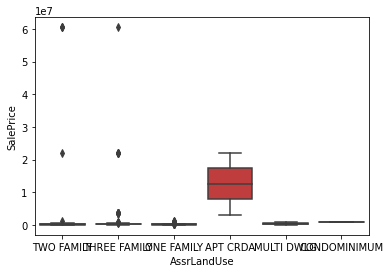

In [27]:
import seaborn as sns

sns.boxplot(x='AssrLandUse', y='SalePrice', data=cleaned)

Scatter plot of SalePrice vs. TotalAppraisedValue:

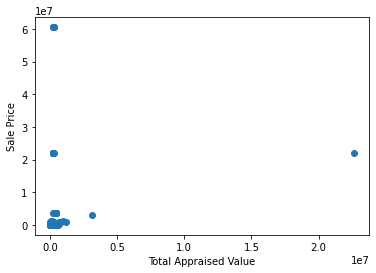

In [28]:
import matplotlib.pyplot as plt

plt.scatter(cleaned['TotalAppraisedValue'], cleaned['SalePrice'])
plt.xlabel('Total Appraised Value')
plt.ylabel('Sale Price')
plt.show()

Property Type vs. Sale Price Heatmap: This heatmap shows the average sale price for each property type in the dataset. It can be created using the Pandas and Matplotlib libraries in Python:

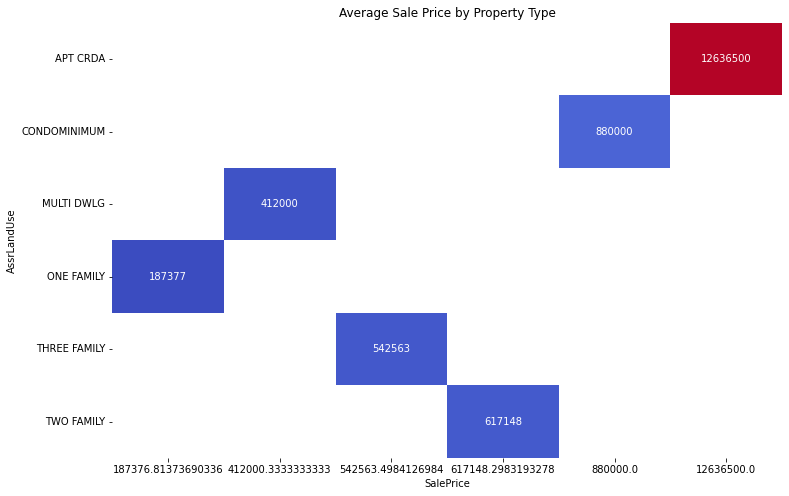

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = cleaned[['AssrLandUse', 'SalePrice']]
df = df.groupby('AssrLandUse').mean()
df = df.reset_index()

plt.figure(figsize=(12,8))
plt.title('Average Sale Price by Property Type')
sns.heatmap(df.pivot(index='AssrLandUse', columns='SalePrice', values='SalePrice'), cmap='coolwarm', annot=True, fmt=".0f", cbar=False)
plt.show()

Scatterplot matrix: A scatterplot matrix is a grid of scatterplots that shows the relationship between each pair of variables in a dataset. You can use the pairplot() function from the Seaborn library to create a scatterplot matrix. 

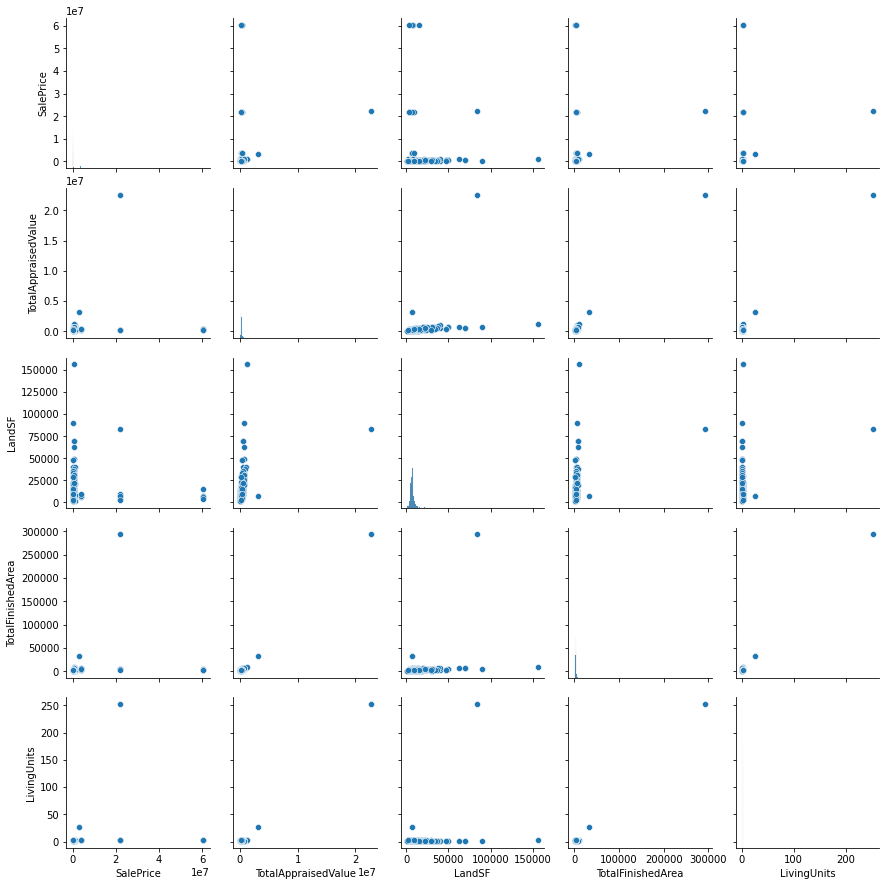

In [30]:
# select the variables to plot
variables = ['SalePrice', 'TotalAppraisedValue', 'LandSF', 'TotalFinishedArea', 'LivingUnits']

# create the scatterplot matrix
sns.pairplot(cleaned[variables])

## Methods

### Sample Code Attempt Regularlized Logistic Regression

In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [33]:
# Create a binary target variable: affordable (0) or expensive (1)
cleaned['Target'] = cleaned['SalePrice'].apply(lambda x: 0 if x <= 250000 else 1)

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleaned[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']], cleaned['Target'], test_size=0.2, random_state=42)

In [35]:
# Scale numerical variables using standardization or normalization
scaler = StandardScaler()
X_train[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']] = scaler.fit_transform(X_train[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']])
X_test[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']] = scaler.transform(X_test[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']])

In [36]:
# Create a pipeline that scales the data and applies regularized logistic regression with penalty parameter tuning
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000))
])

param_grid = {'clf__l1_ratio': [0, 0.25, 0.5, 0.75, 1], 'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__l1_ratio': [0, 0.25, 0.5, 0.75, 1]})

In [37]:
# Predict the target variable using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

In [53]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.876
Precision: 0.858
Recall: 0.728
F1-score: 0.788


In [39]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

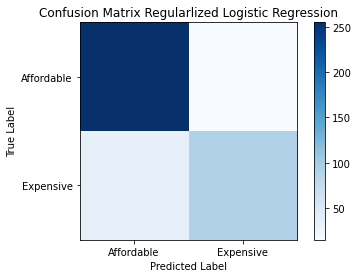

In [40]:
# Visualize the confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix Regularlized Logistic Regression")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Affordable', 'Expensive'])
plt.yticks(tick_marks, ['Affordable', 'Expensive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

Mean Absolute Error: 0.124
Mean Squared Error: 0.124
R-squared: 0.427


### SVM Model

In [42]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [43]:
# Split the dataset into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(cleaned[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']], cleaned['Target'], test_size=0.2, random_state=42)

In [44]:
# Scale numerical variables using standardization or normalization
scaler_svm = StandardScaler()
X_train_svm[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']] = scaler_svm.fit_transform(X_train_svm[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']])
X_test_svm[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']] = scaler_svm.transform(X_test_svm[['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits']])

In [45]:
# Create a pipeline that scales the data and applies SVM with hyperparameter tuning
pipeline_svm = Pipeline([
    ('scaler_svm', StandardScaler()),
    ('clf_svm', SVC(kernel='rbf'))
])

param_grid_svm = {'clf_svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'clf_svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svm = GridSearchCV(pipeline_svm, param_grid=param_grid_svm, cv=5)
grid_search_svm.fit(X_train_svm, y_train_svm)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler_svm', StandardScaler()),
                                       ('clf_svm', SVC())]),
             param_grid={'clf_svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf_svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [46]:
# Predict the target variable using the best model
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test_svm)

In [47]:
# Evaluate the performance of the model
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
precision_svm = precision_score(y_test_svm, y_pred_svm)
recall_svm = recall_score(y_test_svm, y_pred_svm)
f1_svm = f1_score(y_test_svm, y_pred_svm)

print(f"Accuracy: {accuracy_svm:.3f}")
print(f"Precision: {precision_svm:.3f}")
print(f"Recall: {recall_svm:.3f}")
print(f"F1-score: {f1_svm:.3f}")

Accuracy: 0.970
Precision: 0.959
Recall: 0.944
F1-score: 0.952


In [48]:
# Calculate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm)

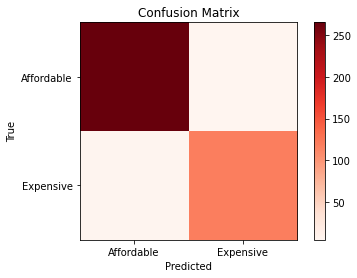

In [52]:
# Visualize the confusion matrix
plt.imshow(conf_matrix_svm, cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks_svm = [0, 1]
plt.xticks(tick_marks_svm, ['Affordable', 'Expensive'])
plt.yticks(tick_marks_svm, ['Affordable', 'Expensive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
# Calculate the mean absolute error (MAE), mean squared error (MSE), and coefficient of determination (R-squared)
mae_svm = mean_absolute_error(y_test_svm, y_pred_svm)
mse_svm = mean_squared_error(y_test_svm, y_pred_svm)
r2_svm = r2_score(y_test_svm, y_pred_svm)

# Print the results
print("SVM Model:")
print(f"MAE: {mae_svm:.3f}")
print(f"MSE: {mse_svm:.3f}")
print(f"R-squared: {r2_svm:.3f}")

SVM Model:
MAE: 0.030
MSE: 0.030
R-squared: 0.860


### Assumption Checking

Linearity:

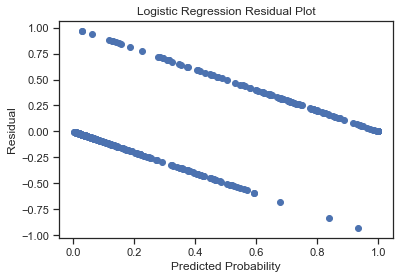

In [62]:
# LOG: Create a dataframe of the predicted probabilities and residuals
df_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'proba': grid_search.best_estimator_.predict_proba(X_test)[:,1]})
df_results['residuals'] = df_results['y_test'] - df_results['proba']

# Create a plot of the predicted probabilities versus the residuals
plt.scatter(df_results['proba'], df_results['residuals'])
plt.title("Logistic Regression Residual Plot")
plt.xlabel("Predicted Probability")
plt.ylabel("Residual")
plt.show()

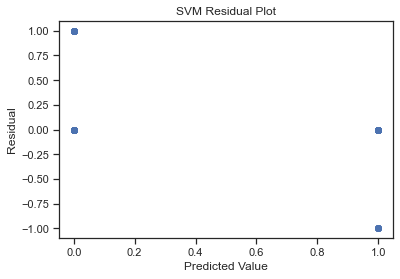

In [63]:
# SVM: Create a dataframe of the predicted values and residuals
df_results_svm = pd.DataFrame({'y_test_svm': y_test_svm, 'y_pred_svm': grid_search_svm.best_estimator_.predict(X_test_svm)})
df_results_svm['residuals'] = df_results_svm['y_test_svm'] - df_results_svm['y_pred_svm']

# Create a plot of the predicted values versus the residuals
plt.scatter(df_results_svm['y_pred_svm'], df_results_svm['residuals'])
plt.title("SVM Residual Plot")
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.show()


Independence

In [65]:
!pip install yellowbrick

     |████████████████████████████████| 282 kB 3.7 MB/s eta 0:00:01


In [68]:
X_train.shape[1]

6

In [67]:
# Check independence assumptions for logistic regression model
# Check linearity between features and logit of the outcome variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the variance inflation factors (VIF) for the features
X = X_train
X['Intercept'] = 1
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Check for multicollinearity between features
from yellowbrick.features import rank2d

rank2d(X_train, size=(10, 5), features=['TotalFinishedArea', 'SalePrice', 'LandSF', 'TotalAppraisedValue', 'LivingUnits'])

               Feature    VIF
0    TotalFinishedArea 175.17
1            SalePrice   1.03
2               LandSF   1.72
3  TotalAppraisedValue  64.65
4          LivingUnits 107.76
5            Intercept   1.00


YellowbrickValueError: number of supplied feature names does not match the number of columns in the training data.

<Figure size 10x5 with 0 Axes>

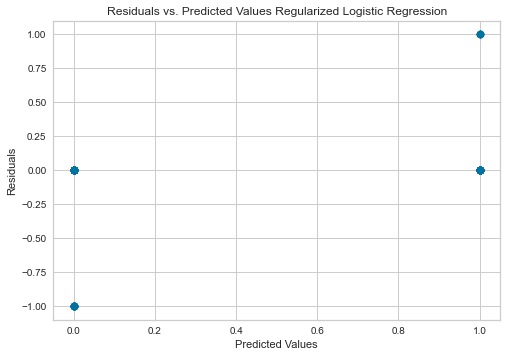

   VIF Factor             features
0      174.94    TotalFinishedArea
1        1.72               LandSF
2       64.64  TotalAppraisedValue
3      107.64          LivingUnits
4        1.00            Intercept


In [69]:
# Check for independence assumptions log

# Calculate the residuals
y_pred_resid = y_pred - y_test

# Plot the residuals against the predicted values
plt.scatter(y_pred, y_pred_resid)
plt.title("Residuals vs. Predicted Values Regularized Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Check for multicollinearity using variance inflation factor (VIF)
X_train_vif = X_train.drop("SalePrice", axis=1) # SalePrice is highly correlated with Target
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif["features"] = X_train_vif.columns
print(vif)

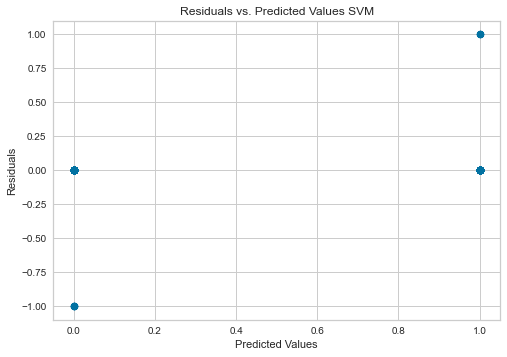

   VIF Factor             features
0      174.94    TotalFinishedArea
1        1.72               LandSF
2       64.64  TotalAppraisedValue
3      107.64          LivingUnits


In [70]:
# Check for independence assumptions

# Calculate the residuals
y_pred_resid_svm = y_pred_svm - y_test_svm

# Plot the residuals against the predicted values
plt.scatter(y_pred_svm, y_pred_resid_svm)
plt.title("Residuals vs. Predicted Values SVM")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Check for multicollinearity using variance inflation factor (VIF)
X_train_svm_vif = X_train_svm.drop("SalePrice", axis=1) # SalePrice is highly correlated with Target
vif_svm = pd.DataFrame()
vif_svm["VIF Factor"] = [variance_inflation_factor(X_train_svm_vif.values, i) for i in range(X_train_svm_vif.shape[1])]
vif_svm["features"] = X_train_svm_vif.columns
print(vif_svm)

Outliers:

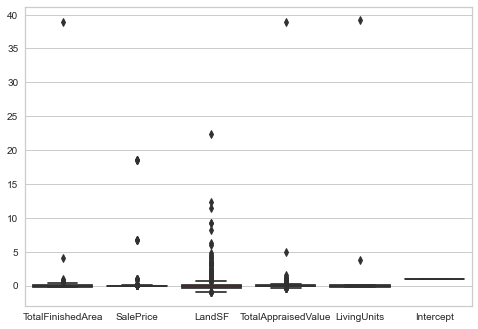

In [72]:
# LOG: Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers using Boxplot
sns.boxplot(data=X_train)
plt.show()

In [73]:

# Check for outliers using Z-score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(X_train))
print(z)


      TotalFinishedArea  SalePrice  LandSF  TotalAppraisedValue  LivingUnits  \
1199               0.11       0.13    0.16                 0.06         0.01   
1775               0.01       0.06    0.35                 0.06         0.15   
3476               0.05       0.13    0.58                 0.15         0.17   
1926               0.08       0.08    0.23                 0.08         0.15   
1822               0.10       0.13    0.69                 0.01         0.15   
...                 ...        ...     ...                  ...          ...   
2368               0.12       0.06    1.52                 0.06         0.01   
2685               0.21       0.09    0.70                 0.26         0.17   
1817               0.16       0.09    0.30                 0.14         0.15   
3018               0.11       0.05    0.28                 0.05         0.15   
2361               0.04       0.07    0.24                 0.08         0.17   

      Intercept  
1199        NaN  
177

In [74]:
# Check for outliers using IQR
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TotalFinishedArea     0.27
SalePrice             0.04
LandSF                0.38
TotalAppraisedValue   0.15
LivingUnits           0.31
Intercept             0.00
dtype: float64


In [75]:
# SVM: Check for outliers using IQR
Q1_svm = X_train_svm.quantile(0.25)
Q3_svm = X_train_svm.quantile(0.75)
IQR_svm = Q3_svm - Q1_svm
print(IQR_svm)

TotalFinishedArea     0.27
SalePrice             0.04
LandSF                0.38
TotalAppraisedValue   0.15
LivingUnits           0.31
dtype: float64


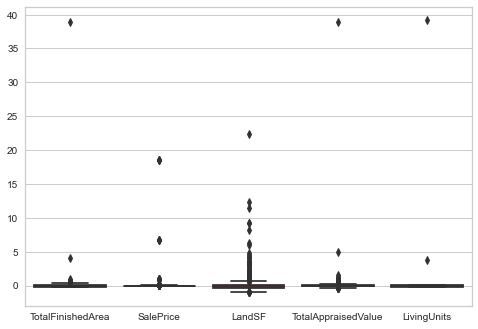

In [76]:
# Check for outliers using Boxplot
sns.boxplot(data=X_train_svm)
plt.show()